Code from *Python Machine Learning 3rd Edition* by Sebastian Raschka, Packt Publishing Ltd. 2019

Prepared for use in COSC-247 Machine Learning at Amherst College, Fall 2020, by Lee Spector (lspector@amherst.edu).



In [61]:
print("The goal is to make a comparison when we train our models using different learning algorithms: \n Logistic Regression Classifier using gradient descent vs Perceptrons in scikit-learn.")

The goal is to make a comparison when we train our models using different learning algorithms: 
 Logistic Regression Classifier using gradient descent vs Perceptrons in scikit-learn.


In [62]:
## I used publicly available Breast Cancer data from the scikit learn database, 
## with 569 wisconsin breastcancer entries.

## We want to classify whether a cancer is malignant or benign using the attributes: mean compactness and mean symmetry.

## First we begin by using a Logistic Regression Classifier using gradient descent.

In [37]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Logistic cost function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [51]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
X = breast_cancer_data.data[:, [5, 8]]
y = breast_cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train) ## Note that we standard only on the basis of the training set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# breast_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

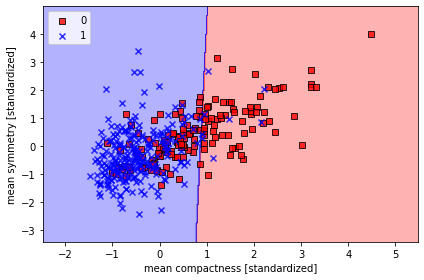

In [52]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('mean compactness [standardized]')
plt.ylabel('mean symmetry [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_05.png', dpi=300)
plt.show()

In [53]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c=[], #c='', ## CHANGED TO AVOID A WARNING
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

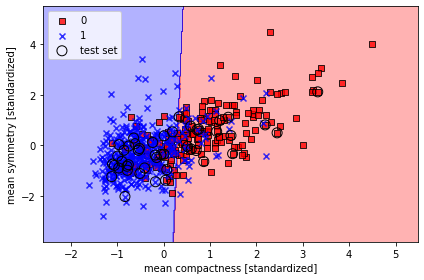

In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('mean compactness [standardized]')
plt.ylabel('mean symmetry [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [55]:
lr.predict_proba(X_test_std[:3, :])

array([[0.96457708, 0.03542292],
       [0.43088733, 0.56911267],
       [0.11488573, 0.88511427]])

In [56]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [57]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([0, 1, 1])

In [58]:
lr.predict(X_test_std[:3, :])

array([0, 1, 1])

In [63]:
## We will then proceed to train using a Perceptron

In [64]:
print('Class labels:', np.unique(y))

Class labels: [0 1]


In [66]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [212 357]
Labels counts in y_train: [148 250]
Labels counts in y_test: [ 64 107]


In [67]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [68]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 41


In [69]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.760


In [70]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c=[], #c='', ## CHANGED TO AVOID A WARNING
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [71]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [72]:
X_combined_std

array([[ 0.08040662,  0.22222348],
       [-0.36433558,  1.46153709],
       [-0.61527323,  0.28123841],
       ...,
       [-1.46648216, -1.15356217],
       [ 3.33475439,  2.86314177],
       [ 1.01208736,  1.77874236]])

In [73]:
y_combined

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,

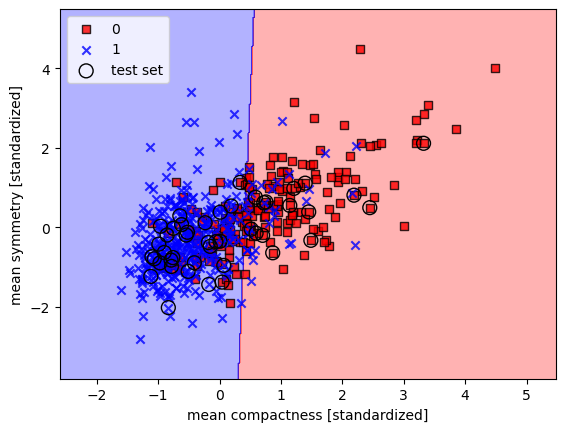

In [74]:
%matplotlib inline
plt.rcdefaults() 

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('mean compactness [standardized]')
plt.ylabel('mean symmetry [standardized]')
plt.legend(loc='upper left')

plt.show()

In [76]:
ppn = Perceptron(eta0=0.1, random_state=1, verbose=1)
ppn.fit(X_train_std, y_train)

-- Epoch 1
Norm: 0.19, NNZs: 2, Bias: 0.100000, T: 398, Avg. loss: 0.034278
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.44, NNZs: 2, Bias: 0.000000, T: 796, Avg. loss: 0.035326
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.17, NNZs: 2, Bias: 0.000000, T: 1194, Avg. loss: 0.034111
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 2, Bias: 0.100000, T: 1592, Avg. loss: 0.034512
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 2, Bias: 0.000000, T: 1990, Avg. loss: 0.031080
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.29, NNZs: 2, Bias: 0.100000, T: 2388, Avg. loss: 0.031632
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.25, NNZs: 2, Bias: 0.000000, T: 2786, Avg. loss: 0.031597
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.18, NNZs: 2, Bias: 0.100000, T: 3184, Avg. loss: 0.035426
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.26, NNZs: 2, Bias: 0.000000, T: 3582, Avg. loss: 0.033721
Total training time: 0.00 sec

Perceptron(eta0=0.1, random_state=1, verbose=1)

In [78]:
X = breast_cancer_data.data[:, [5, 8]].tolist()
y = breast_cancer_data.target.tolist()
X_reduced = [X[i] for i in range(len(X)) if y[i] in [0, 1]]
print("X size changed from", len(X), "to", len(X_reduced))
y_reduced = [v for v in y if v in [0, 1]]
print("y size changed from", len(y), "to", len(y_reduced))

X size reduced from 569 to 569
y size reduced from 569 to 569


In [81]:
X = np.array(X_reduced)
y = np.array(y_reduced)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [212 357]
Labels counts in y_train: [148 250]
Labels counts in y_test: [ 64 107]


In [82]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 41


In [83]:
ppn = Perceptron(eta0=0.1, random_state=1, verbose=1)
ppn.fit(X_train_std, y_train)

-- Epoch 1
Norm: 0.19, NNZs: 2, Bias: 0.100000, T: 398, Avg. loss: 0.034278
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.44, NNZs: 2, Bias: 0.000000, T: 796, Avg. loss: 0.035326
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.17, NNZs: 2, Bias: 0.000000, T: 1194, Avg. loss: 0.034111
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 2, Bias: 0.100000, T: 1592, Avg. loss: 0.034512
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 2, Bias: 0.000000, T: 1990, Avg. loss: 0.031080
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.29, NNZs: 2, Bias: 0.100000, T: 2388, Avg. loss: 0.031632
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.25, NNZs: 2, Bias: 0.000000, T: 2786, Avg. loss: 0.031597
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.18, NNZs: 2, Bias: 0.100000, T: 3184, Avg. loss: 0.035426
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.26, NNZs: 2, Bias: 0.000000, T: 3582, Avg. loss: 0.033721
Total training time: 0.00 sec

Perceptron(eta0=0.1, random_state=1, verbose=1)

In [84]:
ppn = Perceptron(eta0=0.1, random_state=1, verbose=1, early_stopping=True, n_iter_no_change=1)
ppn.fit(X_train_std, y_train)

-- Epoch 1
Norm: 0.21, NNZs: 2, Bias: 0.100000, T: 358, Avg. loss: 0.032219
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 2, Bias: 0.200000, T: 716, Avg. loss: 0.030245
Total training time: 0.00 seconds.
Convergence after 2 epochs took 0.00 seconds


Perceptron(early_stopping=True, eta0=0.1, n_iter_no_change=1, random_state=1,
           verbose=1)

In [85]:
## We notice that despite no significant differeneces in these classifiers, the perceptron finishes the trainings
## much faster. 